## Importación de Librerías

Comenzaremos importando las librerías necesarias para nuestro análisis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import pipeline

## Carga de Datos

Cargamos los datos desde el archivo CSV en un DataFrame de pandas.

In [ ]:
data = pd.read_csv("dataset/top_items_reviews.csv")

## División de DataFrame

Divideremos el DataFrame en uno de películas y otro de series

In [ ]:
# Dividir el DataFrame en dos: uno para películas y otro para series
movies_df = data[data['type'] == 'movie']
tvshows_df = data[data['type'] == 'tvshow']

# Mostrar las primeras filas de cada DataFrame para verificar
movies_df_titles = movies_df["title"]
tvshows_df_titles = tvshows_df["title"]

# Mostrar los títulos de las películas
print("Películas a elegir:")
for index, title in enumerate(movies_df_titles):
    print(f"{index}. {title}")

# Mostrar los títulos de las series
print("\nSeries a elegir:")
for index, title in enumerate(tvshows_df_titles):
    print(f"{index}. {title}")



## Selección de Película y Serie
Seleccionaremos la película y la serie de la que busquemos realizar el análisis de datos. Para esta elección tendrás que cambiar el número que aparece en el iloc, mediante los índices dados en el apartado de arriba.

In [ ]:
# Seleccionando la primera película del DataFrame de películas para el análisis
selected_movie = movies_df.iloc[0]

# Seleccionando la primera serie del DataFrame de series para el análisis
selected_tvshow = tvshows_df.iloc[0]

# Mostrar la información de la película seleccionada
selected_movie_info = selected_movie[['title', 'release_date', 'genres', 'user_reviews', 'critic_reviews']]
print(selected_movie_info)

print("\n")

# Mostrar la información de la serie seleccionada
selected_tvshow_info = selected_tvshow[['title', 'release_date', 'genres', 'user_reviews', 'critic_reviews']]
print(selected_tvshow_info)

## Wordcloud

Primero definimos el método que generará la wordcloud, de manera que podremos usarlo tanto para diferentes reseñas (críticas y de usuarios), como diferentes items (películas y series)


In [63]:

# Función para generar un wordcloud a partir de las reseñas
def generate_wordcloud(reviews,title):
    text = " ".join([review for score, review in reviews])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap="viridis",contour_color="steelblue").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20, fontweight='bold', pad=30)
    plt.axis('off')
    plt.show()



Procedemos a generar las wordcloud para la película y la serie

# Pelicula

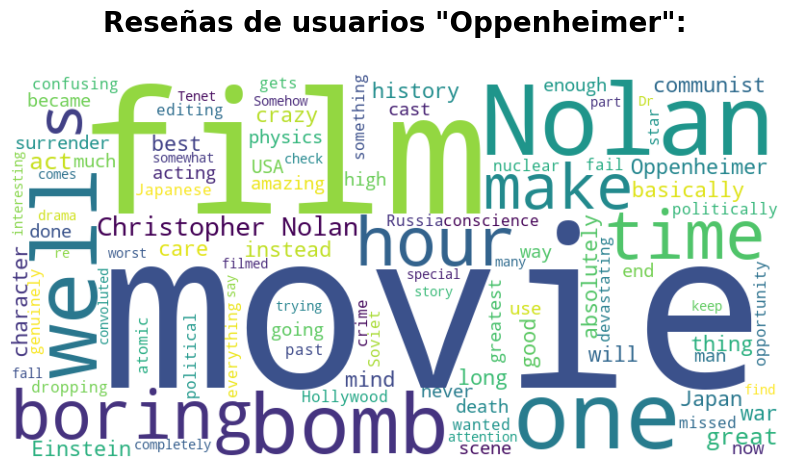

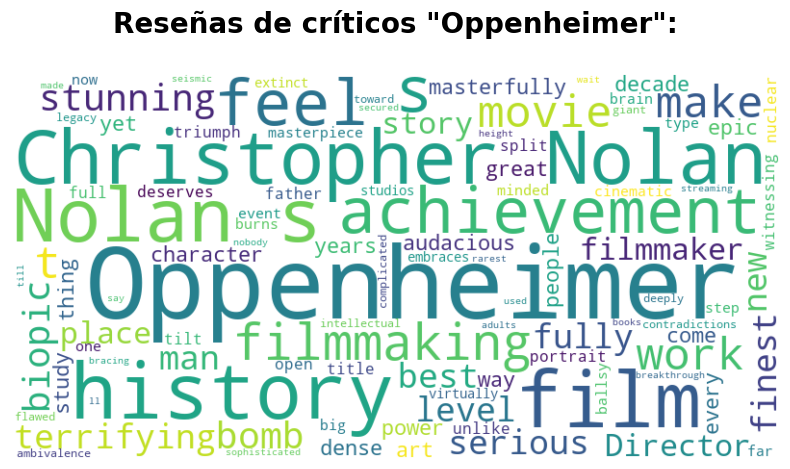

In [65]:
# Preprocesamiento y análisis de las reseñas de usuarios y críticos
user_reviews_movie = ast.literal_eval(selected_movie['user_reviews'])
critic_reviews_movie = ast.literal_eval(selected_movie['critic_reviews'])

# Generar y mostrar wordcloud para las reseñas de usuarios
generate_wordcloud(user_reviews_movie, f"Reseñas de usuarios \"{selected_movie['title']}\":")

# Generar y mostrar wordcloud para las reseñas de críticos
generate_wordcloud(critic_reviews_movie, f"Reseñas de críticos \"{selected_movie['title']}\":")

# Serie

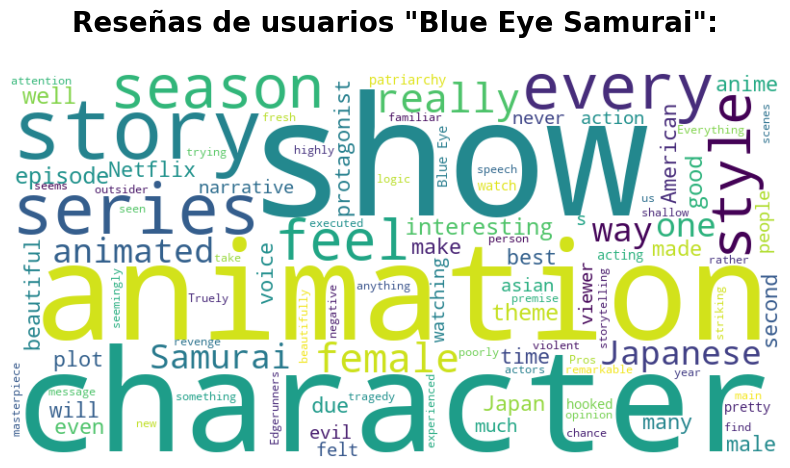

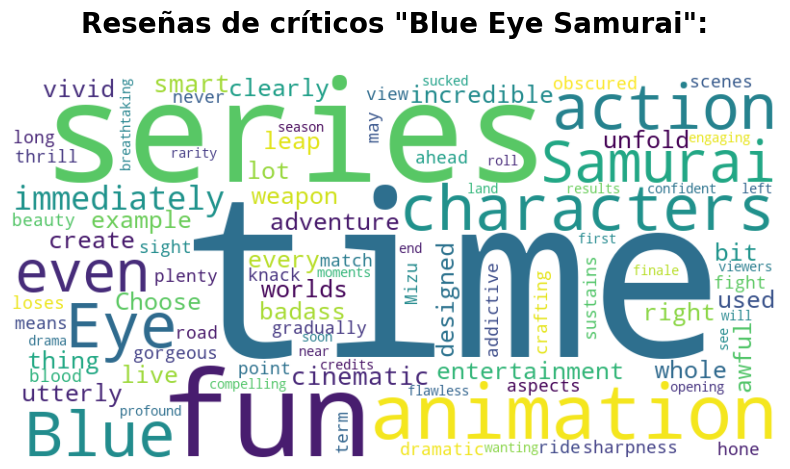

In [66]:
# Preprocesamiento y análisis de las reseñas de usuarios y críticos
user_reviews_tvshow = ast.literal_eval(selected_tvshow['user_reviews'])
critic_reviews_tvshow = ast.literal_eval(selected_tvshow['critic_reviews'])

# Generar y mostrar wordcloud para las reseñas de usuarios
generate_wordcloud(user_reviews_tvshow, f"Reseñas de usuarios \"{selected_tvshow['title']}\":")

# Generar y mostrar wordcloud para las reseñas de críticos
generate_wordcloud(critic_reviews_tvshow, f"Reseñas de críticos \"{selected_tvshow['title']}\":")